In [12]:
import numpy as np
import matplotlib.pyplot as plt

def numerical_diff(f,x):
    """一元函数的梯度"""
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)


# 单个数据的梯度，可以是一元函数也可以是多元函数
def numerical_gradient(f,x):
    """
    求一元或者多元函数梯度，传入的 x 是一维数组，代表坐标，浮点数。比如 x = [1.0,2.0] 就是二元函数在 (1,2) 上的点。求的是在这个点上的二元函数的两个方向的偏导
    """
    h = 1e-4

    grad = np.zeros_like(x) # 假如是二元函数，传入变量 x = [3,4]，则现在 grad = [0,0]，grad[0],grad[1] 分别是二元函数的两个变量的梯度
    
    for idx in range(x.size): # x: [3,4], idx: [0,1]
        tmp_val = x[idx] # tmp_val=x[0]=3
        x[idx] = tmp_val + h # x: [3+h,4]
        fxh1 = f(x) # [3+h,4] 对应的函数值 f
        x[idx] = tmp_val - h
        fxh2 = f(x)
        grad[idx] = (fxh1-fxh2) / (2*h)
        
        x[idx] = tmp_val # 还原x
        
    return grad


# 下面两个函数定义了多个数据的梯度，其中每个数据可以是一元或者多元函数
def _numerical_gradient_1d(f,x):
    """
    求一元或者多元函数梯度，传入的 x 是一维数组，代表坐标，浮点数。比如 x = [1.0,2.0] 就是二元函数在 (1,2) 上的点。求的是在这个点上的二元函数的两个方向的偏导
    """
    h = 1e-4

    grad = np.zeros_like(x) # 假如是二元函数，传入变量 x = [3,4]，则现在 grad = [0,0]，grad[0],grad[1] 分别是二元函数的两个变量的梯度

    for idx in range(x.size): # x: [3,4], idx: [0,1]
        tmp_val = x[idx] # tmp_val=x[0]=3
        x[idx] = tmp_val + h # x: [3+h,4]
        fxh1 = f(x) # [3+h,4] 对应的函数值 f
        x[idx] = tmp_val - h
        fxh2 = f(x)
        grad[idx] = (fxh1-fxh2) / (2*h)
        
        x[idx] = tmp_val # 还原x
        
    return grad
    

def numerical_gradient_2d(f,X):
    """2d数组的梯度"""

    if X.ndim == 1:
        return _numerical_gradient_1d(f,X)
    else:
        grad = np.zeros_like(X) # X=[[2,3,4],[1,2,1]], grad=[[0,0,0],[0,0,0]]
        
        for idx, x in enumerate(X): #  x=[2,3,4],[1,2,1], idx=0,1
            grad[idx] = _numerical_gradient_1d(f,x)
        
        return grad

In [13]:
# 梯度函数的测试
import numpy as np
def f(x):
    return x[0]**2 + x[1]**2
x = np.array([[2.0,4.0],[1.0,3.0]])
numerical_gradient_2d(f,x)

array([[4., 8.],
       [2., 6.]])

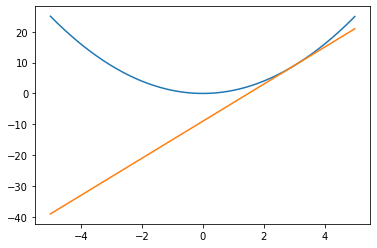

In [10]:
# 图 - x**2 导数及其斜率

def f(x):
    return x**2

def tangent_line(f,x):
    y = f(x)
    k = numerical_diff(f,x)
    b = y - k*x

    return lambda t: k*t + b


x = np.arange(-5,5,0.01)
# 函数
y1 = f(x)
# 切线
y2 = tangent_line(f,3)(x) # 在 3 处的斜率
plt.plot(x,y1)
plt.plot(x,y2)

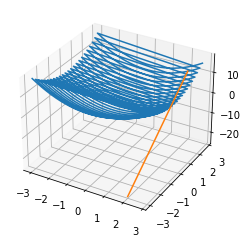

In [11]:
# 图 - x[0]=2, x[1]=1 处 x[1] 的偏导
def f_2(x):
    return x[0]**2 + x[1]**2

    
def tan(x):
    y =f_2(x)
    k = x[0]**2 + 2*x[1]
    b = y - k*x[0]
    return lambda t: k*t + b

x = [2,1]

x0 = np.arange(-3,3,0.25)
x1 = np.arange(-3,3,0.25)
X,Y = np.meshgrid(x0,x1)
X = X.flatten()
Y = Y.flatten()

ax = plt.axes(projection='3d')
ax.plot3D(X,Y,f_2([X,Y]))
ax.plot3D(2*np.ones_like(Y),Y,tan(x)(Y))